<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

You are working for the state education board and your main responsibility is to increase SAT/ACT scores in your state. There are two main areas your stakeholders would like you to explore:
1.  Your stakeholders have heard that increasing participation rates will result in a fall in SAT/ACT scores. They are concerned that if they increase participation rates (such as via mandatory test policies), the state will have lower mean test scores. Investigating trends in participation rates and test scores, please find out if this is true.

2. Your stakeholders think that states with higher elementary and secondary school state budgets have higher SAT/ACT scores and increasing the state budgets in this area will improve test scores as schools have more funding to better focus on these tests. 


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

SAT and ACT tests results at a state level have always been an area of interests for students, parents, and education providers. Some states with a large number of top colleges or high schools tend to have better testing scores compared to others. In addition, some researchers have suggested that states with larger education budgets have higher tests scores ([*source*](https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate)). This will be something that I will explore further in this project.  

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`budget_2016_2017.csv`](./data/budget_2016_2017.csv): 2016 and 2017 Elementary and Secondary Education Budget Per Capita by State

### Outside Research

For datasets, I have obtained the 2016 and 2017 Elementary School Budget Per Capita by State data from the Tax Policy Centre ([Source](https://www.taxpolicycenter.org/statistics/state-and-local-general-expenditures-capita)). All other data and arguments based on outside research are attributed in their revelant sections below.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def mean_calc(n):
    '''Returns mean by dividing sum of all values with # of values in list'''
    
    return sum(n) / len(n)        

In [2]:
list_test = [1,3,5,7,8]

In [3]:
mean_calc(list_test)

4.8

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [4]:
def std_calc(m):
    '''Returns stdev by finding sum of squares to compute variance'''
    
    var_num = 0
    for num in m:
        var_num += ((num - mean_calc(m))**2) #sum of squaures (sum of all squared deviations)
    return (var_num / len(m))**0.5 #sqrt of variance
        

In [5]:
std_calc(list_test)

2.5612496949731396

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [6]:
def clean_percent(p):
    '''Returns % from string (arg) to float'''
    
    if p[-1] != '%':
        return "This is not a % value" #kicks out string value without % 
    else:
        return float(p.strip('%'))/100 

In [7]:
clean_percent('9.563124%')

0.09563124

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [8]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

<font color='blue'>**1. Import datasets and display first 5 rows of each dataset**</font> 

In [9]:
sat_2017 = pd.read_csv(r'../data/sat_2017.csv')
act_2017 = pd.read_csv(r'../data/act_2017.csv')
sat_2018 = pd.read_csv(r'../data/sat_2018.csv')
act_2018 = pd.read_csv(r'../data/act_2018.csv')

In [10]:
sat_2017.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [11]:
sat_2018.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [12]:
act_2017.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [13]:
act_2018.head(5)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


<font color='blue'>**2. Check for missing values**</font>

In [14]:
#Missing values check (sat_2017.csv)

sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [15]:
#Missing values check (sat_2018.csv)

sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [16]:
#Missing values check (act_2017.csv)

act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [17]:
#Missing values check (act_2018.csv)

act_2018.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

<font color='darkblue'>**3. & 4. Obvious issues and fixes for each dataset**</font>

**Summary of issues with the dataset:**
- Minimum score of 52 in 'Math' in SAT 2017 - SAT scores cannot be lower than 200
- There is a % value in the 'Composite' value for Wyoming in ACT 2017
- Minimum score of 2.3 in 'Science' in ACT 2017 - while possible (min per subj for ACT = 1), this is an outlier
- Maine is duplicated in ACT 2018
- 'District of Columbia' has different capitalisation in ACT 2017 vs ACT 2018

***Minimum score of 52 in 'Math' in SAT 2017***

SAT scores per section cannot be lower than 200. Checking the data on the internet indicates that this is a typo and should be 524 for Maryland. ([Source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))


A boxplot highlights an outlier in the 'Math' column. To identify the outlier, the function `sat_total_check` is applied.

**To note**: The function `sat_total_check` calculates the difference between 'Total' and the sum of 'EBRW' + 'Math' sections. However, due to possible rounding differences (mostly +/- 1 pts) in the 'Total' data, I have applied a tolerance of +/- 3pts in the `sat_total_check` function.

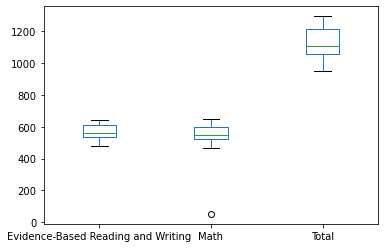

In [18]:
sat_2017.plot.box();

In [19]:
def sat_total_check(row):
    '''Function to quickly pull out rows if EBRW and Math > +-3 pts of Total'''
    # +-3 pts tolerance used because there are slight differences due to rounding
    
    row['Error'] = abs(row['Total'] - row['Evidence-Based Reading and Writing'] - row['Math']) > 3
    return row

In [24]:
check_sat = sat_2017.apply(sat_total_check, axis=1)
sat_2017.loc[check_sat['Error']==True,:]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [25]:
#Fix 52 to 524 as per internet source

sat_2017.loc[sat_2017['State'] == 'Maryland', ['Math']] = 524

***% string value in 'Composite' section and 2.3 min score in 'Science' in ACT 2017***

Two issues are identified in the ACT 2017 dataset and will be fixed concurrently.


Performing the same boxplot visualisation as per the previous error, two things are noted:
1. The 'Composite' section is missing - data are strings, 'x' in 20.2 score for Wyoming
2. Outlier in the 'Science' section - 2.3 min score for Maryland

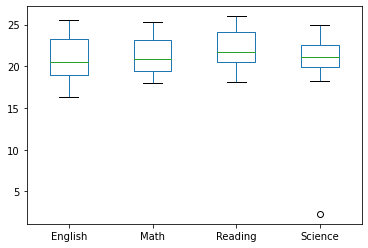

In [26]:
act_2017.plot.box();

In [27]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


Looking at the datatype with `.info()`, 'Composite' data are actually strings. Using a `for` loop, the error is on index 51 i.e. Wyoming. 

Checking the data on the internet indicates that this is a typo and should be 20.2 for Wyoming. [Source](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)



In [28]:
for i, value in enumerate(act_2017['Composite']):
   try:
      float(value)
   except:
      print('Error at index {}: {!r}'.format(i, value)) 

Error at index 51: '20.2x'


In [29]:
act_2017.iloc[51,:]  

State            Wyoming
Participation       100%
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite          20.2x
Name: 51, dtype: object

In [30]:
#Fix for error

act_2017.loc[act_2017['State'] == 'Wyoming', ['Composite']] = 20.2
act_2017['Composite'] = act_2017['Composite'].astype(float)

The outlier in 'Science' section is due to the 2.3 score observed in Maryland. A similar function `act_composite_check` was used to pick up the outlier. The lower tolerance of +/- 1 was also used to exclude small differences due to rounding.

Checking the data on the internet indicates that this is a typo and should be 23.2 for Maryland. [Source](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)

In [31]:
def act_composite_check(row):
    '''Function to quickly pull out rows if sum of 4 sections > +-3 pts of Composite * 4'''
    #Composite scores is counted from the average of the 4 sections
    # +-1 pts tolerance used because there are slight differences in the data due to rounding
    
    row['Errors'] = abs(
            (row['Composite'] *4) - \
            row['English'] - \
            row['Math'] - \
            row['Reading'] - \
            row['Science']
    ) > 1
    return row

In [32]:
check_act = act_2017.apply(act_composite_check, axis=1)
check_act.loc[check_act['Errors']==True,:]

,State,Participation,English,Math,Reading,Science,Composite,Errors
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6,True


In [33]:
#Fix for errors
#Update Science in Maryland to 23.2 in act_2017

act_2017.loc[act_2017['State'] == 'Maryland', ['Science']] = 23.2

***Duped 'Maine' data in ACT 2018***

Scrutinising the number of rows in each dataset with the `len` function datasets shows that all of them have the same number of row entries. However, looking at the data with the `.head()` function suggests that there is a row of 'National' data in ACT 2018. Since we are interested in a state level analysis, I will be removing the 'National' data (will be done in Question 8). 

In [34]:
act_2018.loc[act_2018.duplicated(subset=['State']), :]

,State,Participation,Composite
20,Maine,7%,24.0


In [35]:
#Fix for errors
#Drop duplicate 'Maine' row in act_2018

act_2018.drop_duplicates(subset=['State'], inplace=True)
act_2018.reset_index(drop=True, inplace=True)

***District of Columbia has different capitalisation in different datasets***

This issue will cause errors when merging datasets later on. To standardise, we will use 'District of Columbia'.

In [36]:
#Fix 'District of Columbia' capitalisation in act_2018

act_2018['State'] = act_2018['State'].str.replace('District of columbia', 'District of Columbia')

***Other observations of datasets***
- act_2017 has segmentation by sections but act_2018 has only composite score
- Searching for the 2018 data online suggests that ACT has stopped providing the segmentation from 2018

<br>

<font color='darkblue'>**5. Display datatypes of each dataset**</font>

In [37]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [38]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [39]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [40]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

<br>

<font color='darkblue'>**6. Fix wrong datatypes**</font>

*'Composite' string datetype for act_2017 was fixed in question 4 above*

Update % to float using `clean_percent`

In [41]:
#Clean up 'Participation' string values to integers using clean_percent function

act_2017['Participation'] = act_2017['Participation'].map(clean_percent)
sat_2017['Participation'] = sat_2017['Participation'].map(clean_percent)
act_2018['Participation'] = act_2018['Participation'].map(clean_percent)
sat_2018['Participation'] = sat_2018['Participation'].map(clean_percent)

<br>

<font color='darkblue'>**7. Rename columns**</font>

In [42]:
act_2017.rename(columns={
    'State': 'state', 
    'Participation': 'act_2017_participation', 
    'English': 'act_2017_english', 
    'Math': 'act_2017_math', 
    'Reading': 'act_2017_reading', 
    'Science': 'act_2017_science', 
    'Composite': 'act_2017_composite'}, 
    inplace=True)

In [43]:
act_2018.rename(columns={
    'State': 'state', 
    'Participation': 'act_2018_participation', 
    'Composite': 'act_2018_composite'}, 
    inplace=True)

In [44]:
sat_2017.rename(columns={
    'State': 'state', 
    'Participation': 'sat_2017_participation', 
    'Evidence-Based Reading and Writing': 'sat_2017_ebrw', 
    'Math': 'sat_2017_math', 
    'Total': 'sat_2017_total'}, 
    inplace=True)

In [45]:
sat_2018.rename(columns={
    'State': 'state', 
    'Participation': 'sat_2018_participation', 
    'Evidence-Based Reading and Writing': 'sat_2018_ebrw', 
    'Math': 'sat_2018_math', 
    'Total': 'sat_2018_total'}, 
    inplace=True)

<br>

<font color='darkblue'>**8. Drop unnecessary rows**</font>

We will drop the 'National' data in act_2017 since we are interested in only state level data for this problem.

In [46]:
act_2017.drop(0, axis=0, inplace=True)
act_2017.reset_index(drop=True, inplace=True)

<br>

<font color='darkblue'>**9. Merge anything that can be merged**</font>

To answer the second problem statement, we will need budget data per state. This dataset contains Elementary and Secondary Education budget for FY 2016 and FY 2017. ([Source: US Census Bureau, compiled by Tax Policy Center](https://www.taxpolicycenter.org/statistics/state-and-local-general-expenditures-capita)).

We are using data from the preceding year because we want to study the impact of that budget on test results in the ensuing year. For example, a budget for FY 2016 will be evaluated against test results in 2017.

In [47]:
budget = pd.read_csv(r'../data/budget_2016_2017.csv')

In [50]:
#rounding the values in budget since the dataset have them at 4 decimal places
#columns are named 'budget_per_capita_2016' and 'budget_per_capita_2017'

budget['budget_per_capita_2016'] = budget['budget_per_capita_2016'].map(lambda x: round(x))
budget['budget_per_capita_2017'] = budget['budget_per_capita_2017'].map(lambda x: round(x))

In [51]:
#Merge all dataframes

combined_2017 = pd.merge(sat_2017, act_2017, on='state', how='left')
combined_2018 = pd.merge(sat_2018, act_2018, on='state', how='left')
combined_GA_data = pd.merge(combined_2017, combined_2018, on='state', how='left')
combined_everything = pd.merge(combined_GA_data, budget, on='state', how='left') #this is the dataset we will use 

In [53]:
#Function calculates the change in SAT participation rates between 2017 and 2018
#All float values are rounded to 3 dp.

def sat_participation_change(row):
    row['sat_participation_change']  = round(((row['sat_2018_participation'] / row['sat_2017_participation']) - 1), 3)
    return row

#Function calculates the change in ACT participation rates between 2017 and 2018
def act_participation_change(row):
    row['act_participation_change']  = round(((row['act_2018_participation'] / row['act_2017_participation']) - 1) ,3)
    return row

#Function calculates the change in SAT Total Scores between 2017 and 2018
def sat_total_change(row):
    row['sat_total_change'] = round(((row['sat_2018_total'] / row['sat_2017_total']) - 1), 3)
    return row

#Function calculates the change in ACT Total Scores between 2017 and 2018
def act_total_change(row):
    row['act_composite_change'] = round(((row['act_2018_composite'] / row['act_2017_composite']) - 1), 3)
    return row

#Function calculates the change in budget between 2016 and 2017
def budget_change(row):
    row['budget_change']  = round(((row['budget_per_capita_2017'] / row['budget_per_capita_2016']) - 1), 3)
    return row

combined_everything = combined_everything.apply(sat_total_change, axis=1)
combined_everything = combined_everything.apply(act_total_change, axis=1)
combined_everything = combined_everything.apply(sat_participation_change, axis=1)
combined_everything = combined_everything.apply(act_participation_change, axis=1)
combined_everything = combined_everything.apply(budget_change, axis=1)

<br>

<font color='darkblue'>**10. Export to CSV**</font>

In [54]:
combined_everything.to_csv(r'../data/combined_everything.csv', index=False) #we will be using this for EDA

combined_2017.to_csv(r'../data/combined_2017.csv', index=False) #saved in case needed
combined_2018.to_csv(r'../data/combined_2018.csv', index=False) #saved in case needed
combined_GA_data.to_csv(r'../data/combined_GA_data.csv', index=False) #saved in case needed


### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|combined_everything|All 50 states in USA + D.C.|
|**sat_2017_participation**|*float*|combined_everything|SAT participation rates measured as a percentage of high school seniors who graduated in that state in 2017|
|**sat_2018_participation**|*float*|combined_everything|SAT participation rates measured as a percentage of high school seniors who graduated in that state in 2018|
|**act_2017_participation**|*float*|combined_everything|ACT participation rates measured as a percentage of high school seniors who graduated in that state in 2017|
|**act_2018_participation**|*float*|combined_everything|ACT participation rates measured as a percentage of high school seniors who graduated in that state in 2018|
|**sat_2017_ebrw**|*integer*|combined_everything|SAT average Evidence-Based Reading and Writing score of that state in 2017|
|**sat_2017_math**|*integer*|combined_everything|SAT average Math score of that state in 2017|
|**sat_2017_total**|*integer*|combined_everything|SAT average Total (EBRW + Math) score of that state in 2017|
|**act_2017_english**|*float*|combined_everything|ACT average English score of that state in 2017|
|**act_2017_math**|*float*|combined_everything|ACT average Math score of that state in 2017|
|**act_2017_reading**|*float*|combined_everything|ACT average Reading score of that state in 2017|
|**act_2017_science**|*float*|combined_everything|ACT average Science score of that state in 2017|
|**act_2017_composite**|*float*|combined_everything|ACT average Composite (average scores from 4 sections) score of that state in 2017|
|**sat_2018_ebrw**|*integer*|combined_everything|SAT average Evidence-Based Reading and Writing score of that state in 2017|
|**sat_2018_math**|*integer*|combined_everything|SAT average Math score of that state in 2018|
|**sat_2018_total**|*integer*|combined_everything|SAT average Total (EBRW + Math) score of that state in 2018|
|**act_2018_composite**|*float*|combined_everything|ACT average Composite (average scores from 4 sections) score of that state in 2018|
|**budget_per_capita_2016**|*integer*|combined_everything|USD budget per capita for elementary and secondary schools per state in FY16|
|**budget_per_capita_2017**|*integer*|combined_everything|USD budget per capita for elementary and secondary schools per state in FY17|
|**sat_total_change**|*float*|combined_everything|Change in SAT Total scores from 2017 to 2018|
|**act_composite_change**|*float*|combined_everything|Change in ACT Composite scores from 2017 to 2018|
|**budget_change**|*float*|combined_everything|Change in elementary and secondary education budget by state from 2017 to 2018|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

<font color='darkblue'>**1. Summary Statistics**</font>

In [55]:
combined_everything.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,51.0,0.398039,0.352766,0.020,0.0400,0.380,0.6600,1.000
sat_2017_ebrw,51.0,569.117647,45.666901,482.000,533.5000,559.000,613.0000,644.000
sat_2017_math,51.0,556.882353,47.121395,468.000,523.5000,548.000,599.0000,651.000
sat_2017_total,51.0,1126.098039,92.494812,950.000,1055.5000,1107.000,1212.0000,1295.000
act_2017_participation,51.0,0.652549,0.321408,0.080,0.3100,0.690,1.0000,1.000
act_2017_english,51.0,20.931373,2.353677,16.300,19.0000,20.700,23.3000,25.500
act_2017_math,51.0,21.182353,1.981989,18.000,19.4000,20.900,23.1000,25.300
act_2017_reading,51.0,22.013725,2.067271,18.100,20.4500,21.800,24.1500,26.000
act_2017_science,51.0,21.450980,1.739353,18.200,19.9500,21.300,23.2000,24.900
act_2017_composite,51.0,21.519608,2.020695,17.800,19.8000,21.400,23.6000,25.500


<br>

<font color='darkblue'>**2. Dictionary comprehension to apply std dev by column**</font>

In [56]:
#coln.name : std_calc(coln) are the dersired key : value output for the dictionary
#std_calc() is the std dev calculation from Part 1
#for this calculation, we will only work out integer and float values

sd = {coln.name : std_calc(coln) 
      for coln in 
      [combined_everything[i] for i in combined_everything.columns 
       if (combined_everything[i].dtype=='float64') 
       or (combined_everything[i].dtype=='int64')]
     }

In [57]:
sd

{'sat_2017_participation': 0.3492907076664507,
 'sat_2017_ebrw': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2018_participation': 0.3694661922353942,
 'sat_2018_ebrw': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433,
 'act_2018_participation': 0.33701735820410317,
 'act_2018_composite': 2.090779082141178,
 'budget_per_capita_2016': 567.1465381133556,
 'budget_per_capita_2017': 572.4455285194184,
 'sat_total_change': 0.042994916681374014,
 'act_composite_change': 0.033164717706874895,
 'sat_participation_change': 1.7531916402195278,
 'act_participation_change': 0.16202158095487545,
 'budget_change': 0.027746393650896803}

<br>

<font color='darkblue'>**3. Observe trends in the data**</font>

***Inverse relationship between SAT and ACT participation rates***

Graduating students tend to take only one exam and this is dependent on state policy. For example, Delaware and New Hampshire have high SAT participation rates (>96%) and low ACT participation rates (18%) because of state policy mandating that graduating students take the SAT. This trend is consistent across both 2017 and 2018 datasets.

In [58]:
#negative correlation between SAT and ACT particpation rates

combined_everything[['state','sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']].sort_values(by='sat_2017_participation',ascending=False).head(5)

,state,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
8,District of Columbia,1.00,0.92,0.32,0.32
22,Michigan,1.00,1.00,0.29,0.22
6,Connecticut,1.00,1.00,0.31,0.26
7,Delaware,1.00,1.00,0.18,0.17
29,New Hampshire,0.96,0.96,0.18,0.16


***Significantly more states with 100% participations rates for ACT than SAT***

In 2017, there are 4 states (D.C., Michigan, Connecticut, Delaware) with 100% participation rates for SAT vs. 17 states with 100% participation rates for ACT.

In [59]:
# Highest SAT participation rate 

combined_everything[['state','sat_2017_participation']].sort_values(by='sat_2017_participation',ascending=False).head(5)

,state,sat_2017_participation
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [60]:
#Highest ACT participation rate

combined_everything[['state','act_2017_participation']].sort_values(by='act_2017_participation',ascending=False).head(17)

,state,act_2017_participation
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
33,North Carolina,1.0
28,Nevada,1.0
26,Montana,1.0


***Negative correlation between participation rates and SAT/ACT scores***

In these 14 states with the lowest SAT participation rates, all their mean 'Total' score is higher than the national mean of 1120 in 2017. 
Similar trends can be spotted in the states with the lowest ACT participation rates, and in both 2017 and 2018 datasets.

In [61]:
#SAT participation and composite scores

mask_sat = combined_everything['sat_2017_participation'] < 0.05
combined_everything[mask_sat][['state','sat_2017_participation','sat_2017_total']].sort_values(by='sat_2017_participation',ascending=False)

,state,sat_2017_participation,sat_2017_total
16,Kansas,0.04,1260
17,Kentucky,0.04,1247
18,Louisiana,0.04,1198
3,Arkansas,0.03,1208
23,Minnesota,0.03,1295
25,Missouri,0.03,1271
27,Nebraska,0.03,1253
41,South Dakota,0.03,1216
44,Utah,0.03,1238
49,Wisconsin,0.03,1291


In [62]:
#ACT participation and composite scores 

mask_act = combined_everything['act_2017_participation'] < 0.25
combined_everything[mask_act][['state','act_2017_participation','act_2017_composite']].sort_values(by='act_2017_participation',ascending=False)

,state,act_2017_participation,act_2017_composite
38,Pennsylvania,0.23,23.7
39,Rhode Island,0.21,24.0
7,Delaware,0.18,24.1
29,New Hampshire,0.18,25.5
19,Maine,0.08,24.3


***Higher minimum partication rate for ACT than SAT in 2017***

In 2017, ACT has a higher minimum participation rate (broadly 18 - 23%, if excluding Maine) vs SAT, which has 14 states with less than 5% participation rates.

In [63]:
#ACT 2017 participation rates

combined_everything[['state','act_2017_participation']].sort_values(by='act_2017_participation',ascending=False).tail(5)

,state,act_2017_participation
38,Pennsylvania,0.23
39,Rhode Island,0.21
7,Delaware,0.18
29,New Hampshire,0.18
19,Maine,0.08


In [64]:
#SAT 2017 participation rates

combined_everything[['state','sat_2017_participation']].sort_values(by='sat_2017_participation',ascending=False).tail(5)

,state,sat_2017_participation
3,Arkansas,0.03
50,Wyoming,0.03
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02


***In states that have >50% participation rates in both exams, mean scores for both exams are below the national average***

In 2017, three states have >50% participation rates in both exams (Hawaii, Florida, Georgia). However, their results for both exams are lower than the respective mean scores for all states (1120 for SAT and 21.5 for ACT)

In [126]:
#filter states with >50% participation for both exams

mask_fifty = (combined_everything['act_2017_participation'] > 0.5) & (combined_everything['sat_2017_participation'] > 0.5) 
combined_everything[mask_fifty][['state','act_2017_participation','act_2017_composite','sat_2017_participation','sat_2017_total']].sort_values(by='act_2017_participation',ascending=False)

,state,act_2017_participation,act_2017_composite,sat_2017_participation,sat_2017_total
11,Hawaii,0.90,19.0,0.55,1085
9,Florida,0.73,19.8,0.83,1017
10,Georgia,0.55,21.4,0.61,1050


***Large SAT participation rate changes from 2017 to 2018***

Illinois and Colorado are outliers with 10% and 8% changes in participation rates from 2017 to 2018. This will be further investigated in the visualisation section later. As mentioned, there is a inverse relationship as ACT participation rates dropped by 53% and 70% respectively in the same period.

In [65]:
#Risers SAT participation rates

combined_everything[['state','sat_participation_change','act_participation_change']].sort_values(by='sat_participation_change',ascending=False).head(5)

,state,sat_participation_change,act_participation_change
13,Illinois,10.000,-0.538
5,Colorado,8.091,-0.700
48,West Virginia,1.000,-0.058
3,Arkansas,0.667,0.000
35,Ohio,0.500,0.333


Florida had a significant fall in SAT participation rates, but with no increase in ACT rates from 2017 to 2018 (a 9.6% decline in fact!). This looked a little unusual and upon further investigation, this could be attributed to incorrect data. From internet sources, there is actually an increase in SAT participation rates to 97%. [Source](https://reports.collegeboard.org/pdf/2018-florida-sat-suite-assessments-annual-report.pdf)

In [66]:
#Fallers SAT participation rates

combined_everything[['state','sat_participation_change','act_participation_change']].sort_values(by='sat_participation_change',ascending=False).tail(5)

,state,sat_participation_change,act_participation_change
50,Wyoming,0.000,0.000
2,Arizona,-0.033,0.065
8,District of Columbia,-0.080,0.000
28,Nevada,-0.115,0.000
9,Florida,-0.325,-0.096


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

<font color='darkblue'>**1. Heatmap to visualise correlation**</font>

There are a few observations based on the heatmap below:
- Negative correlation between SAT and ACT participation rates ((ρ) -84% to -87%)
- Negative correlation between ACT participation rates and composite scores for both years ((ρ) -86% to -87%)


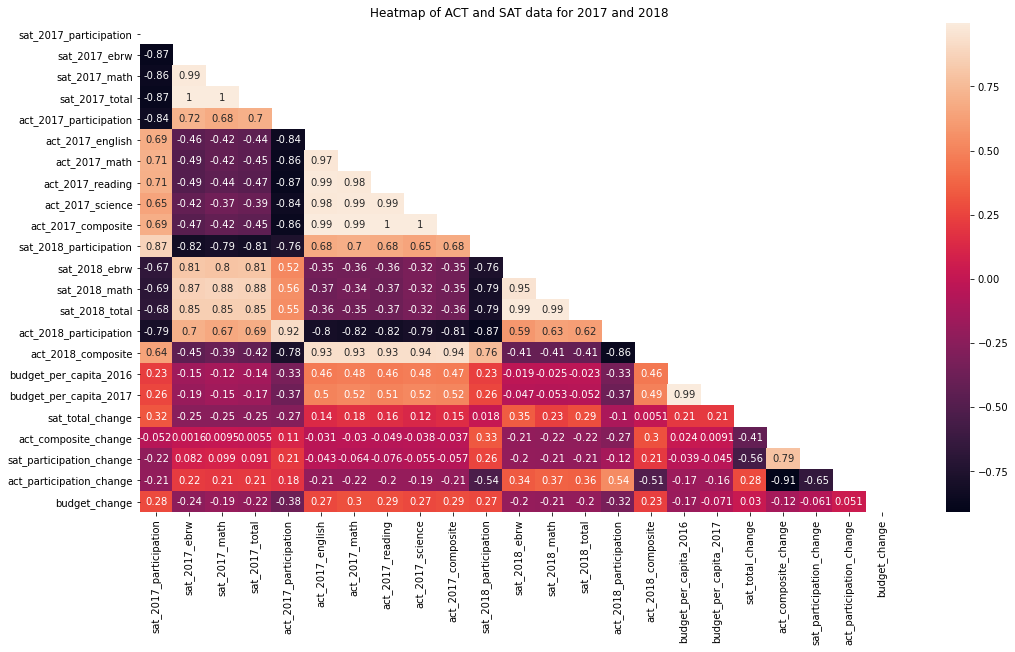

In [152]:
plt.figure(figsize=(17,9))

corr = combined_everything.corr()
mask_heatmap = np.zeros_like(corr)
mask_heatmap[np.triu_indices_from(mask_heatmap)] = True

sns.heatmap(corr, mask = mask_heatmap, annot = True)
plt.title('Heatmap of ACT and SAT data for 2017 and 2018');

<br>

Summarising the **two problem statements** again, these are the hypotheses that we wish to test:
   1. Increasing participation rates will not result in a fall in SAT/ACT scores
   2. increasing the state's education budgets will not improve test scores

<font color='darkblue'>**Distribution of participation rates for ACT and SAT in 2017 and 2018**</font>

- Distributions on both ACT and SAT suggest that there is fairly little change between participation rates from 2017 to 2018.
- They roughly share the same shape except in opposite ends. As picked up in the EDA section: 

    - For the highest maximum participation rates in 2017, significantly more 100% participation rates in ACT (17 states)
    - For lowest participation rates in 2017, there are significantly more states that have <5% participation than ACT(14 states)
    - These numbers are fairly constant when looking at the histograms for 2018
    - Such a distribution point to the fact that students usually take only one of the tests. The test they take is likely to be dependent on whether it is mandatory in that state or if one particular test is more widely accepted in that state than the other.

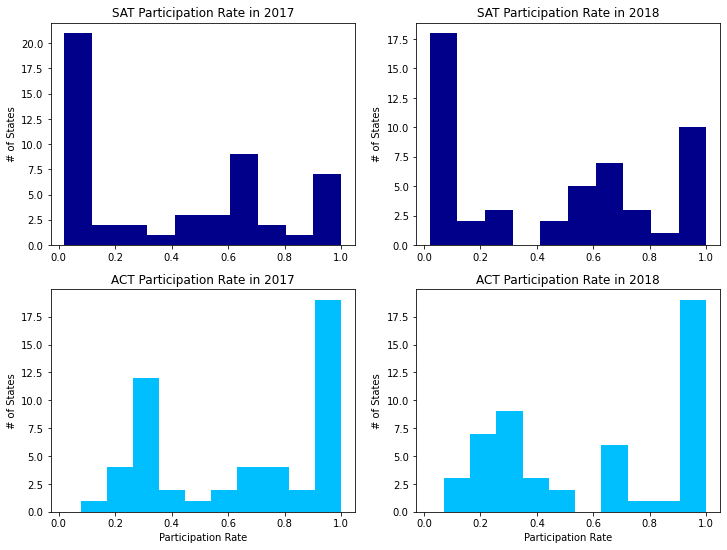

In [138]:
plt.figure(figsize = (12,9))
plt.tight_layout()

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('SAT Participation Rate in 2017')
ax1.hist(combined_everything['sat_2017_participation'], color='Darkblue')
ax1.set_ylabel('# of States');

ax2 = plt.subplot(2, 2, 2, sharex=ax1)
ax2.set_title('SAT Participation Rate in 2018')
ax2.hist(combined_everything['sat_2018_participation'], color='Darkblue')
ax2.set_ylabel('# of States');

ax3 = plt.subplot(2, 2, 3, sharex=ax2)
ax3.set_title('ACT Participation Rate in 2017')
ax3.hist(combined_everything['act_2017_participation'],color='deepskyblue');
ax3.set_ylabel('# of States')
ax3.set_xlabel('Participation Rate');

ax4 = plt.subplot(2, 2, 4, sharex=ax2)
ax4.set_title('ACT Participation Rate in 2018')
ax4.hist(combined_everything['act_2018_participation'],color='deepskyblue')
ax4.set_ylabel('# of States')
ax4.set_xlabel('Participation Rate');

<font color='darkblue'>**No significant changes in distribution of SAT and ACT test scores across 2017 to 2018**</font>

- Before we plot participation rates against test scores. It is helpful to know that test scores have remained fairly constant over the two time periods.
- From the boxplots below, there are no significant changes in test score distribution over the time period (mean and 25% / 75% quartiles roughly similar).

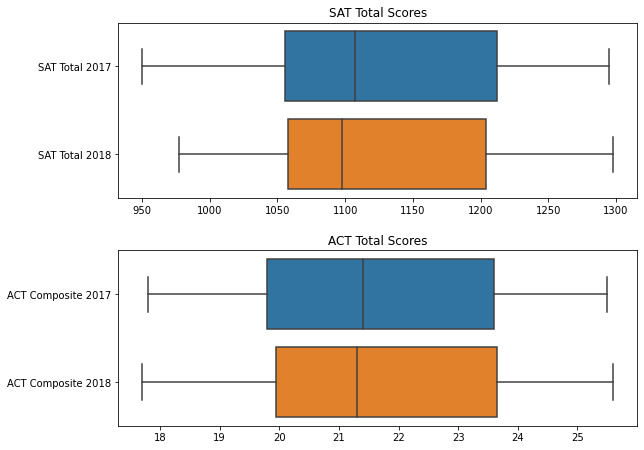

In [148]:
plt.figure(figsize = (9,7))
plt.tight_layout()


ax1 = plt.subplot(2, 1, 1)
sat_scores = combined_everything.loc[:,['sat_2017_total', 'sat_2018_total']].rename(columns={'sat_2017_total':'SAT Total 2017','sat_2018_total':'SAT Total 2018'})
sns.boxplot(data=sat_scores, orient='h')
ax1.set_title('SAT Total Scores');

ax2 = plt.subplot(2, 1, 2)
sat_scores = combined_everything.loc[:,['act_2017_composite', 'act_2018_composite']].rename(columns={'act_2017_composite':'ACT Composite 2017','act_2018_composite':'ACT Composite 2018'})
sns.boxplot(data=sat_scores, orient='h')
ax2.set_title('ACT Total Scores');


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)

<font color='darkblue'>**Negative correlation for SAT and ACT participation rates with test scores**</font>

- There is an observable negative correlation between participation rates and test scores
- This relationship can be seen across both SAT and ACT, and for both 2017 and 2018


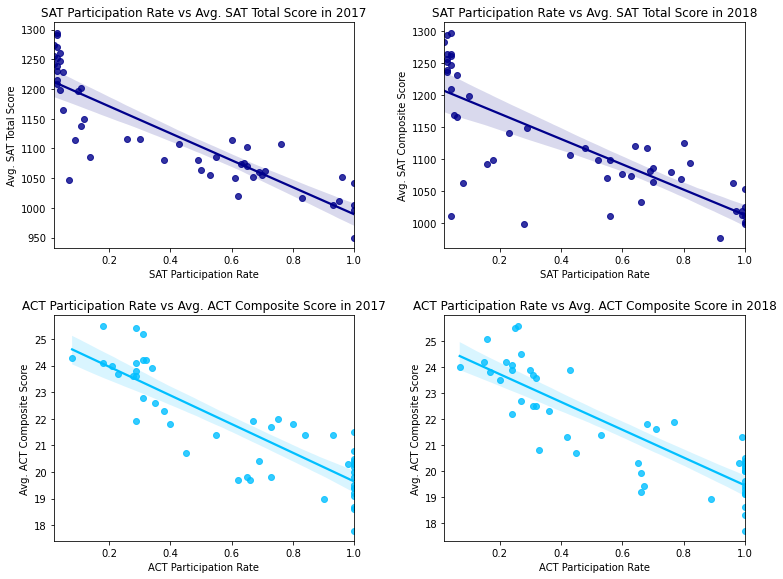

In [136]:
plt.figure(figsize = (12,9))
plt.tight_layout()

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('SAT Participation Rate vs Avg. SAT Total Score in 2017')
sns.regplot(x = combined_everything['sat_2017_participation'], y = combined_everything['sat_2017_total'], color='Darkblue', ax=ax1)
ax1.set_ylabel('Avg. SAT Total Score')
ax1.set_xlabel('SAT Participation Rate');

ax2 = plt.subplot(2, 2, 2, sharex=ax1)
ax2.set_title('SAT Participation Rate vs Avg. SAT Total Score in 2018')
sns.regplot(x = combined_everything['sat_2018_participation'], y = combined_everything['sat_2018_total'], color='Darkblue', ax=ax2)
ax2.set_ylabel('Avg. SAT Composite Score')
ax2.set_xlabel('SAT Participation Rate');

ax3 = plt.subplot(2, 2, 3, sharex=ax2)
ax3.set_title('ACT Participation Rate vs Avg. ACT Composite Score in 2017')
sns.regplot(x = combined_everything['act_2017_participation'], y = combined_everything['act_2017_composite'], color='deepskyblue', ax=ax3)
ax3.set_ylabel('Avg. ACT Composite Score')
ax3.set_xlabel('ACT Participation Rate');

ax4 = plt.subplot(2, 2, 4, sharex=ax2)
ax4.set_title('ACT Participation Rate vs Avg. ACT Composite Score in 2018')
sns.regplot(x = combined_everything['act_2018_participation'], y = combined_everything['act_2018_composite'], color='deepskyblue', ax=ax4)
ax4.set_ylabel('Avg. ACT Composite Score')
ax4.set_xlabel('ACT Participation Rate');

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)

- When we plot the change in participation rates and change in test scores from 2017 to 2018, the negative correlation still stands true.
- However, there are outliers in the SAT datasets (Colorado and Illinois) which we will further investigate in the sections below.
- With the above, such a negative correlation suggest that we might have to **reject our first hypothesis**, which is that increasing participation rates will not decrease test scores for both ACT and SAT exams. 

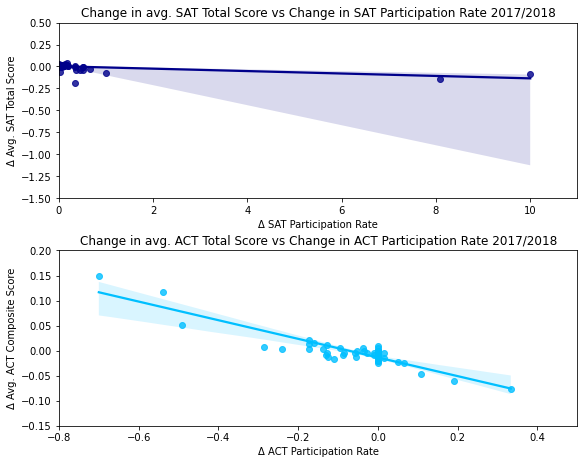

In [175]:
plt.figure(figsize = (9,7))
plt.tight_layout()

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Change in avg. SAT Total Score vs Change in SAT Participation Rate 2017/2018')
sns.regplot(x = combined_everything['sat_participation_change'], y = combined_everything['sat_total_change'], color='Darkblue', ax=ax1)
ax1.set_xlabel('Δ SAT Participation Rate')
ax1.set_ylabel('Δ Avg. SAT Total Score')
ax1.set_xlim([0,11])
ax1.set_ylim([-1.5,0.5]);

ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Change in avg. ACT Total Score vs Change in ACT Participation Rate 2017/2018')
sns.regplot(x = combined_everything['act_participation_change'], y = combined_everything['act_composite_change'], color='deepskyblue', ax=ax2)
ax2.set_xlabel('Δ ACT Participation Rate')
ax2.set_ylabel('Δ Avg. ACT Composite Score')
ax2.set_xlim([-0.8,0.5])
ax2.set_ylim([-0.15,0.2]);

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)

<br>

<font color='darkblue'>**Outliers - Colorado, Illinois and Ohio**</font>

- This is an additional analysis on our first problem statement which says that the increase in participation rates will not affect test scores.
- Empirical evidence suggests that states with lower participation rates tend to have SAT and/or ACT optional policies. 
- Therefore, graduating seniors who choose to take the test even when it is optional tend to do well because they would have prepared for it (selection bias). We will further explore this in the 3 states mentioned below.

***Colorado and Illinois - SAT***
- Significant increase in participation rates from 2017 to 2018 (8x for Colorado and 10x for Illinois)
- Corresponding drop in SAT Total score by 14.7% and 8.6% respectively. This is higher than the mean change of 0.4% nationwide
- Both states started mandating SAT testing during this period which exaplins the sharp increase in participation rate ([Source](https://blog.prepscholar.com/which-states-require-the-sat))

In [156]:
combined_everything.loc[
    combined_everything['sat_participation_change'] > 1, 
    ['state','sat_participation_change', 'sat_total_change']
].rename(columns={
    'state' : 'State', 
    'sat_participation_change': 'Δ SAT Participation 17/18', 
    'sat_total_change': 'Δ SAT Total Score 17/18'
    })

,State,Δ SAT Participation 17/18,Δ SAT Total Score 17/18
5,Colorado,8.091,-0.147
13,Illinois,10.000,-0.086


***Ohio - ACT/SAT***
- Ohio is an example of both test scores declining after an increase in participation rate.
- During this period, it started mandating all 11th graders to take the SAT or ACT, which explains the change in participation rates for both (SAT 50%, ACT 33.3%)
- Both scores have declined after the increase (SAT by 4.4% and ACT by 7.7%)

In [157]:
combined_everything.loc[
    combined_everything['act_participation_change'] >= 0.2, 
    ['state','sat_participation_change', 'sat_total_change', 'act_participation_change', 'act_composite_change']
].rename(columns={'state' : 'State', 
                  'sat_participation_change': 'Δ SAT Participation 17/18', 
                  'sat_total_change': 'Δ SAT Total Score 17/18', 
                  'act_participation_change': 'Δ ACT Participation 17/18', 
                  'act_composite_change': 'Δ ACT Composite Score 17/18'
                 })

,State,Δ SAT Participation 17/18,Δ SAT Total Score 17/18,Δ ACT Participation 17/18,Δ ACT Composite Score 17/18
35,Ohio,0.5,-0.044,0.333,-0.077


<font color='darkblue'>**No observable relationship in SAT scores with budget amount. However, a positive correlation exist for ACT scores**</font>

- SAT: No obvious correlation between a state's budget in previous year vs. test score in the next year
- However, observable positive correlation (ρ) = 46 to 48% in ACT scores
- However, when plotting change in budget vs change in scores - that correlation disappears (2nd visualisation).

- Possible explanation/pit-falls to consider: 
    - Better schools tend to be in richer states, hence are already well funded. Consequently, better schools are likely to have top performing students who would score better in SAT/ACT exams.
    - Moreover, budget by itself is not the only variable that could explain the higher test score. There could be other social and economic factors associated with being in a richer state that can contribute to them performing better.
    - We are only using one datapoint here (2017 to 2018). Therefore, we would need to perform a more in depth analysis over a longer time period to further confirm our observations.

- Therefore, we **cannot confidently reject the second hypothesis** that increasing the budget will increase test scores. However, better funded states tend to produce better ACT scores.

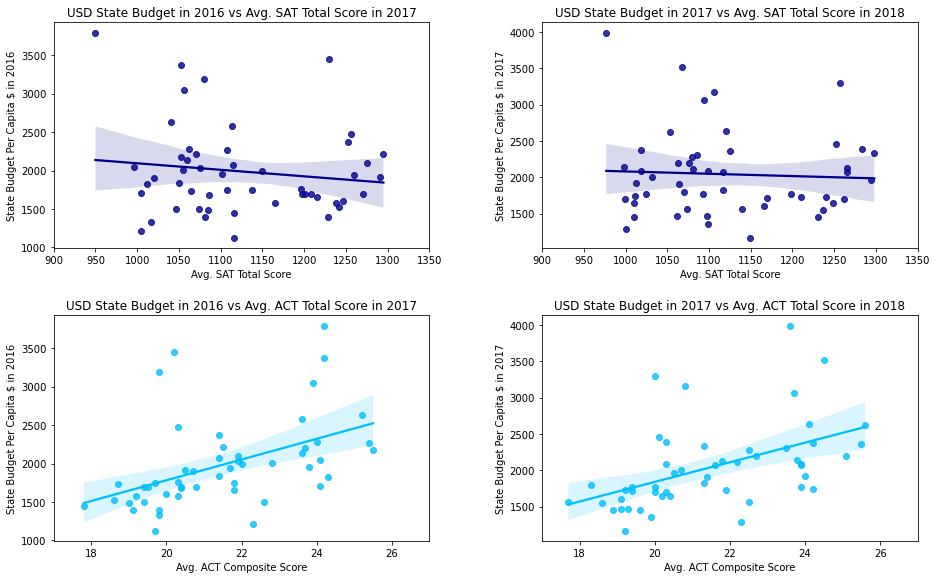

In [149]:
plt.figure(figsize = (15,9))
plt.tight_layout()

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('USD State Budget in 2016 vs Avg. SAT Total Score in 2017')
sns.regplot(x = combined_everything['sat_2017_total'], y = combined_everything['budget_per_capita_2016'], color='Darkblue', ax=ax1)
ax1.set_ylabel('State Budget Per Capita $ in 2016')
ax1.set_xlabel('Avg. SAT Total Score')
ax1.set_xlim([900,1350]);

ax2 = plt.subplot(2, 2, 2, sharex=ax1)
ax2.set_title('USD State Budget in 2017 vs Avg. SAT Total Score in 2018')
sns.regplot(x = combined_everything['sat_2018_total'], y = combined_everything['budget_per_capita_2017'], color='Darkblue', ax=ax2)
ax2.set_xlabel('Avg. SAT Total Score')
ax2.set_ylabel('State Budget Per Capita $ in 2017')
ax2.set_xlim([900,1350]);

ax3 = plt.subplot(2, 2, 3,)
ax3.set_title('USD State Budget in 2016 vs Avg. ACT Total Score in 2017')
sns.regplot(x = combined_everything['act_2017_composite'], y = combined_everything['budget_per_capita_2016'], color='deepskyblue', ax=ax3)
ax3.set_xlabel('Avg. ACT Composite Score')
ax3.set_ylabel('State Budget Per Capita $ in 2016')
ax3.set_xlim([17,27]);

ax4 = plt.subplot(2, 2, 4, sharex=ax3)
ax4.set_title('USD State Budget in 2017 vs Avg. ACT Total Score in 2018')
sns.regplot(x = combined_everything['act_2018_composite'],y = combined_everything['budget_per_capita_2017'], color='deepskyblue')
ax4.set_xlabel('Avg. ACT Composite Score')
ax4.set_ylabel('State Budget Per Capita $ in 2017')
ax4.set_xlim([17,27]);

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)

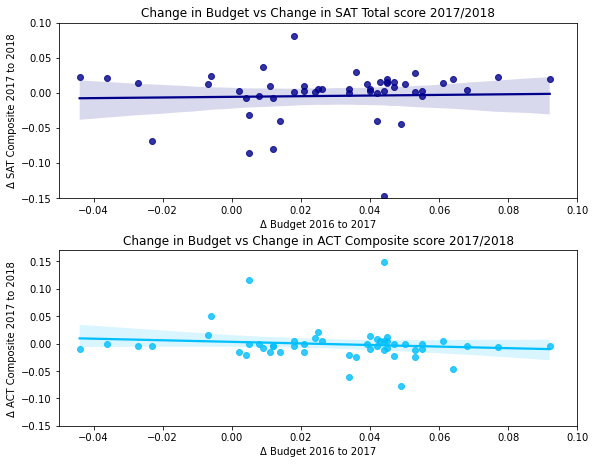

In [180]:
plt.figure(figsize = (9,7))
plt.tight_layout()

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Change in Budget vs Change in SAT Total score 2017/2018')
sns.regplot(x = combined_everything['budget_change'], y = combined_everything['sat_total_change'], color='Darkblue', ax=ax1)
ax1.set_xlabel('Δ Budget 2016 to 2017')
ax1.set_ylabel('Δ SAT Composite 2017 to 2018')
ax1.set_ylim([-0.15,0.1])
ax1.set_xlim([-0.05,0.1]);

ax2 = plt.subplot(2, 1, 2)
ax2.set_title('Change in Budget vs Change in ACT Composite score 2017/2018')
sns.regplot(x = combined_everything['budget_change'],y = combined_everything['act_composite_change'], color='deepskyblue', ax=ax2)
ax2.set_xlabel('Δ Budget 2016 to 2017')
ax2.set_ylabel('Δ ACT Composite 2017 to 2018')
ax2.set_ylim([-0.15,0.17])
ax2.set_xlim([-0.05,0.1]);

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)

<br>

## Conclusions and Recommendations

Our stakeholders at the state education board have set a task for us to find out how to increase SAT/ACT test scores in our state. They have two main areas of concern/interest:

1. There is a negative correlation between participation rates and test scores for both ACT and SAT. Moreover, increasing participation rates via state policies such as mandatory test taking might even cause declines in test scores.

   - Possible recommendations/items to investigate: We could look at more datasets to determine whether these decline in test scores end up being persistent. The decline in results might just be a short term trend as students in that state get used to the new test formats that have moved to / schools get up to speed with coaching their students in the new test.   
   


2. With our current datasets (i.e. 2017 and 2018), there are no observable relationships between changes in budget per capita with changes in score. While there is a slight positive correlation observed in states with high budgets and ACT scores, we cannot definitively say to our stakeholders that increasing the budget will result in immmediate improvements in SAT/ACT test scores the next year.

    - Possible recommendations/items to investigate: It will be helpful to look at longer term data (timeseries plot will be useful) to see if there are any longer term changes in budget vs. test scores. Impact of budget changes might take a longer term to manifest, therefore using a two-year time period in our research might not provide the full picture. 
    - Another point to note is that budget and test scores could be a classic chicken-and-egg problem - while our research looks at increasing budget to improve test scores, it might be helpful to investigate if states are actually trying to improve test scores to push for higher budgets. While federal policy excludes SAT/ACT test scores as a metric to determine funding for schools, it could be possible that good schools want to do well in these test scores so that they would rank well, and as a result, have better funding because they are a better school.
